In [1]:
import pandas
import os

directory = "./thauera-files/ThaueraPaper/"

## Aerobic

In [2]:
folder = "allRxnsAerobic/"

In [3]:
data = {}
for i in os.listdir("{}/{}/".format(directory,folder)):
    if "csv" not in i: continue
    data[i.split(".csv")[0]] = pandas.read_csv(directory+folder+i,header=None)

In [4]:
DataAerobic = data.copy()

In [5]:
scores = {}
for i,df in data.items():
    scores[i] = {
        "eps" : df.sum(0).mean(),
        "carbon" : df.sum(1).mean()
    }
scores = pandas.DataFrame.from_dict(scores).T

In [6]:
STD = {}
for i,df in data.items():
    STD[i] = {
        "eps" : df.std(0).mean(),
        "carbon" : df.std(1).mean()
    }
STD = pandas.DataFrame.from_dict(STD).T

In [7]:
DataAerobic = data.copy()
ScoresAerobic = scores.copy()

<Axes: ylabel='Frequency'>

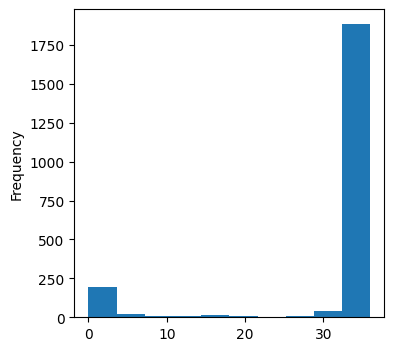

In [8]:
scores["eps"].plot.hist(figsize=(4,4))

<Axes: ylabel='Frequency'>

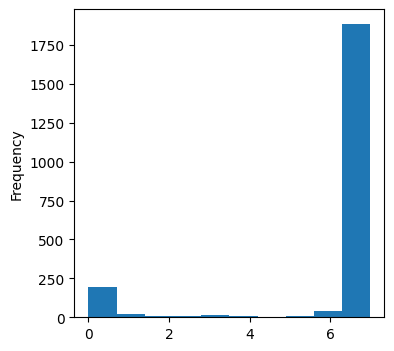

In [9]:
scores["carbon"].plot.hist(figsize=(4,4))

<Axes: xlabel='eps', ylabel='carbon'>

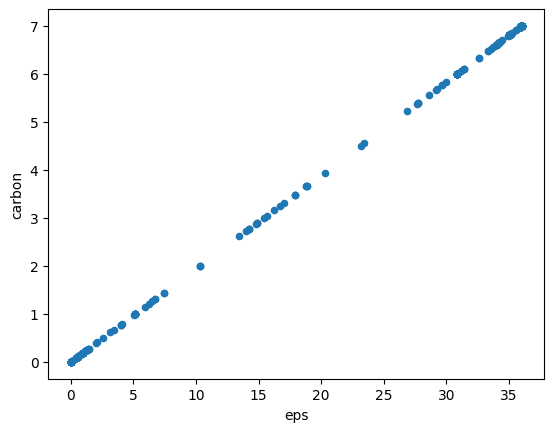

In [10]:
scores.plot.scatter(x="eps",y="carbon")

In [11]:
scores[(scores==0).any(axis=1)]

,eps,carbon
DMATT,0.0,0.0
RBFSa,0.0,0.0
PSCVT,0.0,0.0
DTMPK,0.0,0.0
OGMEACPS,0.0,0.0
...,...,...
KARA1,0.0,0.0
APRAUR,0.0,0.0
UAPGR,0.0,0.0
ACLS,0.0,0.0


In [12]:
STD

,eps,carbon
DPHAPC121,6.371128e-04,3.056343e-04
FDH5pp_1,4.316081e-05,2.504881e-05
METSOXR1,8.976911e-04,4.007575e-04
AIRCr,1.065873e-03,7.132227e-04
CATDOX,6.593316e-06,2.025832e-06
...,...,...
CYPLASL,1.707724e-10,7.530353e-11
NTPTP1,9.768258e-04,5.562276e-04
NADDP,7.954756e-04,4.553887e-04
NOtex,3.499313e-04,1.726760e-04


## Anaerobic

In [40]:
folder = "allRxnsAnaerobic/"

In [41]:
data = {}
for i in os.listdir("{}/{}/".format(directory,folder)):
    if "csv" not in i: continue
    data[i.split(".csv")[0]] = pandas.read_csv(directory+folder+i,header=None)

In [42]:
scores = {}
for i,df in data.items():
    scores[i] = {
        "eps" : df.sum(0).mean(),
        "carbon" : df.sum(1).mean()
    }
scores = pandas.DataFrame.from_dict(scores).T

In [43]:
STD = {}
for i,df in data.items():
    STD[i] = {
        "eps" : df.std(0).mean(),
        "carbon" : df.std(1).mean()
    }
STD = pandas.DataFrame.from_dict(STD).T

In [44]:
DataAnaerobic = data.copy()
ScoresAnaerobic = scores.copy()

<Axes: ylabel='Frequency'>

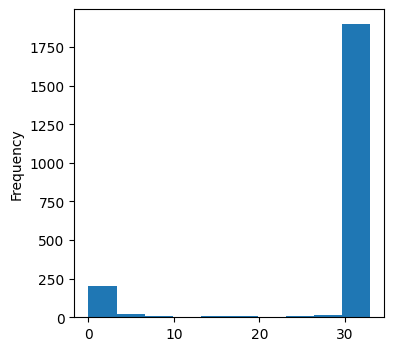

In [45]:
scores["eps"].plot.hist(figsize=(4,4))

<Axes: ylabel='Frequency'>

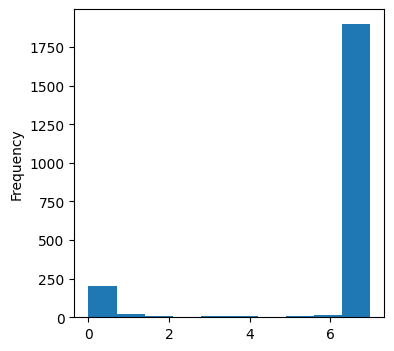

In [46]:
scores["carbon"].plot.hist(figsize=(4,4))

<Axes: xlabel='eps', ylabel='carbon'>

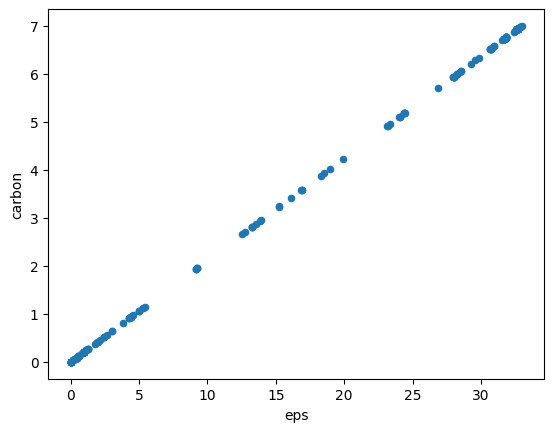

In [47]:
scores.plot.scatter(x="eps",y="carbon")

In [48]:
scores[(scores==0).any(axis=1)]

,eps,carbon
DMATT,0.0,0.0
RBFSa,0.0,0.0
PSCVT,0.0,0.0
DTMPK,0.0,0.0
OGMEACPS,0.0,0.0
...,...,...
KARA1,0.0,0.0
APRAUR,0.0,0.0
UAPGR,0.0,0.0
ACLS,0.0,0.0


In [49]:
STD

,eps,carbon
DPHAPC121,0.035486,0.024526
FDH5pp_1,0.036250,0.023865
METSOXR1,0.035540,0.023357
AIRCr,0.036047,0.024819
CATDOX,0.035199,0.023483
...,...,...
CYPLASL,0.034615,0.022907
NTPTP1,0.035720,0.024109
NADDP,0.034785,0.023053
NOtex,0.036115,0.023791


## Comparison

In [50]:
aerobic_lethals = set(ScoresAerobic[ScoresAerobic==0].dropna().index)
anaerobic_lethals = set(ScoresAnaerobic[ScoresAnaerobic==0].dropna().index)

In [51]:
from matplotlib_venn import venn2

In [52]:
Lethals = {}
for i in aerobic_lethals|anaerobic_lethals:
    Lethals[i] = {
        "aerobic" : i in aerobic_lethals,
        "anaerobic" : i in anaerobic_lethals
    }
Lethals = pandas.DataFrame.from_dict(Lethals).T

In [53]:
Lethals[Lethals["aerobic"] != Lethals["anaerobic"]].sort_values("aerobic")

,aerobic,anaerobic
PPNDH,False,True
Htex,False,True
ARGSL,False,True
CYO1_KT,False,True
NO3tex,False,True
OCBT,False,True
CO2tpp,False,True
CO2tex,False,True
ARGSS,False,True
NO3R3pp_2,False,True


In [54]:
Lethals[Lethals["aerobic"] == Lethals["anaerobic"]]

,aerobic,anaerobic
GRTT,True,True
SHCHD2,True,True
G1SAT,True,True
OPMEACPS,True,True
CU2tex,True,True
...,...,...
UAGAAT,True,True
UPPDC1,True,True
SHK3Dr,True,True
PMDPHT,True,True


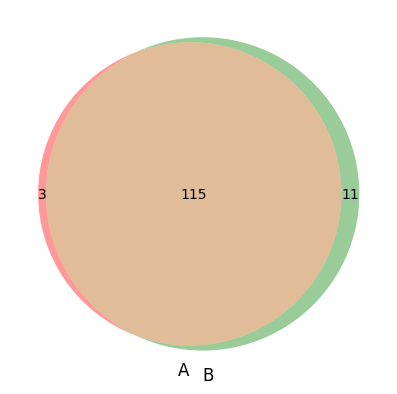

In [55]:
venn2([set(aerobic_lethals),set(anaerobic_lethals)])

In [56]:
from notebooks.save import execute

In [57]:
date = "2024_05_10"
out,err=execute("jupyter nbconvert --to html 6.ReactionEssentiality.ipynb --output-dir=./notebooks/ --output 6.ReactionEssentiality-{}".format(date))